# Importing

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# **Load the Iris dataset**

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Convert to Pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Show first 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# **train_test_split**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Print the shape of each split
print("Train Features:", X_train.shape)
print("Test Features:", X_test.shape)
print("Train Labels:", y_train.shape)
print("Test Labels:", y_test.shape)

Train Features: (105, 4)
Test Features: (45, 4)
Train Labels: (105,)
Test Labels: (45,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

# Different split every time!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(y_test[:5])  # Will be different every time!

[1 0 1 0 2]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print(y_test[:5])  # Always same result!

[1 0 2 1 1]


# **Data Preprocessing**

## **Missing value**

In [ ]:
#missing values:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

data=np.array([
    [1,2],
    [np.nan,3],
    [7,np.nan]
])



imputer=SimpleImputer(strategy='mean')
filled=imputer.fit_transform(data)

print(filled)

[[1.  2. ]
 [4.  3. ]
 [7.  2.5]]


In [ ]:
#missing values:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

data=np.array([
    [1,2],
    [np.nan,3],
    [7,6]
])



imputer=KNNImputer(n_neighbors=2)
filled=imputer.fit_transform(data)

print(filled)

[[1. 2.]
 [4. 3.]
 [7. 6.]]


## **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Original data
data = np.array([[1, 2],
                 [3, 4],
                 [5, 6]])

# Apply StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(data)

print("Original:\n", data)
print("Standardized:\n", scaled)

Original:
 [[1 2]
 [3 4]
 [5 6]]
Standardized:
 [[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

print("Min-Max Scaled:\n", scaled)

Min-Max Scaled:
 [[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]


In [ ]:
from sklearn.preprocessing import RobustScaler

data_with_outliers = np.array([[1, 2],
                               [3, 4],
                               [100, 200]])  # Extreme outlier

scaler = RobustScaler()
scaled = scaler.fit_transform(data_with_outliers)

print("Robust Scaled:\n", scaled)

Robust Scaled:
 [[-0.04040404 -0.02020202]
 [ 0.          0.        ]
 [ 1.95959596  1.97979798]]


## **Categorical Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

labels = ['apple', 'banana', 'apple', 'orange']
encoder = LabelEncoder()
encoded = encoder.fit_transform(labels)

print("Labels:", labels)
print("Encoded:", encoded)

Labels: ['apple', 'banana', 'apple', 'orange']
Encoded: [0 1 0 2]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

categories = np.array([['apple'], ['banana'], ['orange'],['apple']])

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(categories)

print("One-hot Encoded:\n", encoded)

One-hot Encoded:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

data = [['low'], ['medium'], ['high']]
encoder = OrdinalEncoder(categories=[[ 'medium','low', 'high']])
encoded = encoder.fit_transform(data)

print("Ordinal Encoded:\n", encoded)

Ordinal Encoded:
 [[1.]
 [0.]
 [2.]]


## **Outliesra**

In [ ]:
from sklearn.preprocessing import RobustScaler

data_with_outliers = np.array([[1, 2],
                               [3, 4],
                               [100, 200]])  # Extreme outlier

scaler = RobustScaler()
scaled = scaler.fit_transform(data_with_outliers)

print("Robust Scaled:\n", scaled)

In [ ]:
import numpy as np

data = np.array([10, 12, 15, 14, 13, 90])
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

filtered = data[(data >= Q1 - 1.5*IQR) & (data <= Q3 + 1.5*IQR)]
filtered

array([10, 12, 15, 14, 13])

## Transformation

In [ ]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

data = np.array([[1], [10], [100]])

# log1p = log(x + 1) --> لتجنب log(0)
log_transform = FunctionTransformer(np.log1p)
log_data = log_transform.fit_transform(data)

print("Log-transformed:\n", log_data)

Log-transformed:
 [[0.69314718]
 [2.39789527]
 [4.61512052]]


In [ ]:
sqrt_transform = FunctionTransformer(np.sqrt)
sqrt_data = sqrt_transform.fit_transform(data)

print("Sqrt-transformed:\n", sqrt_data)

Sqrt-transformed:
 [[ 1.        ]
 [ 3.16227766]
 [10.        ]]


In [ ]:
from sklearn.preprocessing import PowerTransformer

data = np.array([[1], [10], [100]])

pt = PowerTransformer(method='box-cox')
boxcox_data = pt.fit_transform(data)

print("Box-Cox transformed:\n", boxcox_data)

Box-Cox transformed:
 [[-1.22474489e+00]
 [ 2.75594369e-08]
 [ 1.22474486e+00]]


In [ ]:
pt = PowerTransformer(method='yeo-johnson')
yeo_data = pt.fit_transform(data)

print("Yeo-Johnson transformed:\n", yeo_data)

Yeo-Johnson transformed:
 [[-1.20252236]
 [-0.0432968 ]
 [ 1.24581916]]


## Feature Extraction

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

# إنشاء PCA تقلل الأبعاد إلى 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Original shape:", X.shape)
print("PCA shape:", X_pca.shape)

Original shape: (150, 4)
PCA shape: (150, 2)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# تحميل البيانات
X, y = load_iris(return_X_y=True)

# 1. توحيد البيانات (مهم جدًا قبل PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. إنشاء PCA
pca = PCA(n_components=2)  # نريد 2 فقط

# 3. تطبيق PCA
X_pca = pca.fit_transform(X_scaled)

print("شكل البيانات بعد PCA:", X_pca.shape)

شكل البيانات بعد PCA: (150, 2)


In [ ]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Explained:", sum(pca.explained_variance_ratio_))

Explained Variance Ratio: [0.72962445 0.22850762]
Total Explained: 0.9581320720000166


# Model creation

## logisitic regression

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#create model :
model=LogisticRegression()

#training :
model.fit(X_train,y_train)
#testing :
y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)


1.0


In [ ]:
#knn :
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#create model :
model=KNeighborsClassifier(n_neighbors=2)

#training :
model.fit(X_train,y_train)
#testing :
y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)


1.0


In [ ]:
#tree :
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#create model :
model=DecisionTreeClassifier()

#training :
model.fit(X_train,y_train)
#testing :
y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)


1.0


In [ ]:
#Random forest ::
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#create model :
model=RandomForestClassifier()

#training :
model.fit(X_train,y_train)
#testing :
y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)


1.0


In [ ]:
#svc:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#create model :
model=SVC()

#training :
model.fit(X_train,y_train)
#testing :
y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)


1.0


# **Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load data
X, y = load_iris(return_X_y=True)
X[0, 0] = None  # deliberately insert NaN

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Build pipeline
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),      # Step 1
    ('scaler', StandardScaler()),                     # Step 2
    ('classifier', KNeighborsClassifier(n_neighbors=3))  # Step 3
])

# Train the pipeline
pipe.fit(X_train, y_train)

# Predict using the same pipeline
predictions = pipe.predict(X_test)

In [ ]:
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

X_transformed = preprocessor.fit_transform(X_train)

In [ ]:
#pipe.named_steps['scaler']
pipe.named_steps['classifier'].predict(X_test)m

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Step 1: الاستيراد
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Step 2: تحميل البيانات
data = load_breast_cancer()
X, y = data.data, data.target

# Step 3: إضافة قيم مفقودة بشكل صناعي
X[0][0] = np.nan
X[5][3] = np.nan
X[10][7] = np.nan

# Step 4: تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: بناء الـ Pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),     # تعويض القيم المفقودة
    ('scaler', StandardScaler()),                    # توحيد القيم
    ('classifier', LogisticRegression())             # نموذج التصنيف
])

# Step 6: تدريب الـ Pipeline
pipeline.fit(X_train, y_train)

# Step 7: التنبؤ على بيانات الاختبار
y_pred = pipeline.predict(X_test)

# Step 8: تقييم النموذج
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9736842105263158


In [ ]:
# Step 1: الاستيراد
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Step 2: تحميل البيانات
data = load_breast_cancer()
X, y = data.data, data.target

# Step 3: إدخال بعض القيم المفقودة صناعيًا
X[0][0] = np.nan
X[15][3] = np.nan

# Step 4: تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: بناء الـ Pipeline
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Step 6: إعداد Grid Search
params = {
    'knn__n_neighbors': [3, 5, 7, 9],         # نجرب 4 قيم للجيران
    'knn__weights': ['uniform', 'distance']  # ونجرب نوع الوزن
}

grid = GridSearchCV(pipe, param_grid=params, cv=5)

# Step 7: تدريب Grid Search
grid.fit(X_train, y_train)

# Step 8: طباعة أفضل معامل
print("Best Parameters:", grid.best_params_)

# Step 9: اختبار النموذج على بيانات الاختبار
y_pred = grid.predict(X_test)

# Step 10: تقييم الدقة
acc = accuracy_score(y_test, y_pred)
print("Accuracy with best KNN:", acc)

Best Parameters: {'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
Accuracy with best KNN: 0.9473684210526315


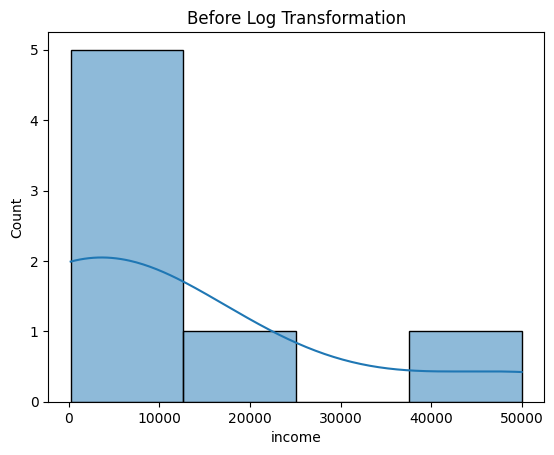

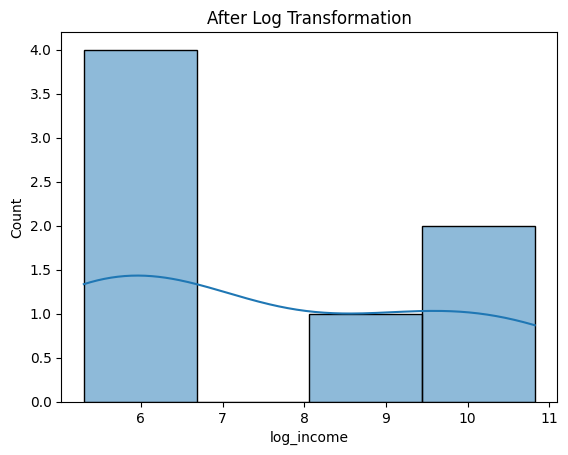

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# بيانات منحرفة يمينًا
df = pd.DataFrame({'income': [200, 300, 400, 500, 10000, 20000, 50000]})

# قبل التحويل
sns.histplot(df['income'], kde=True)
plt.title("Before Log Transformation")
plt.show()

# بعد التحويل
df['log_income'] = np.log1p(df['income'])
sns.histplot(df['log_income'], kde=True)
plt.title("After Log Transformation")
plt.show()

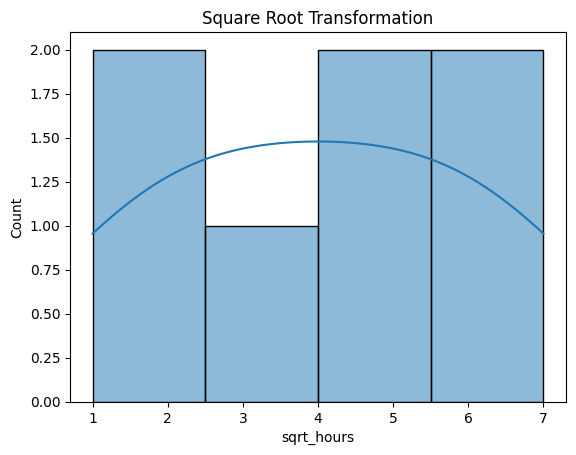

In [ ]:
df = pd.DataFrame({'hours': [1, 4, 9, 16, 25, 36, 49]})
df['sqrt_hours'] = np.sqrt(df['hours'])

sns.histplot(df['sqrt_hours'], kde=True)
plt.title("Square Root Transformation")
plt.show()

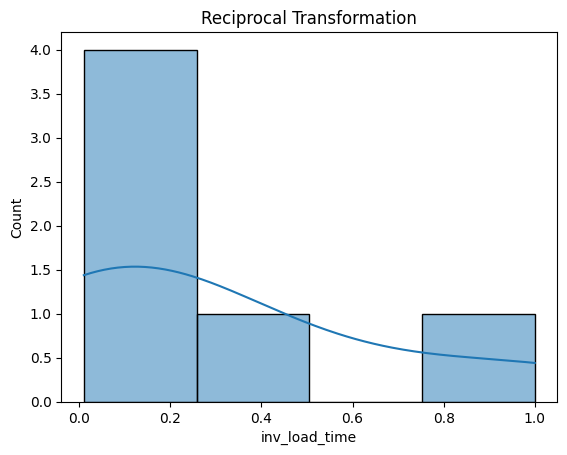

In [ ]:
df = pd.DataFrame({'load_time': [1, 2, 5, 10, 50, 100]})
df['inv_load_time'] = 1 / df['load_time']

sns.histplot(df['inv_load_time'], kde=True)
plt.title("Reciprocal Transformation")
plt.show()

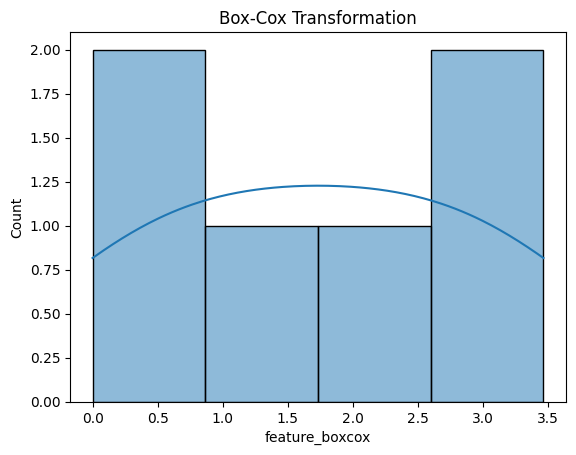

In [ ]:
from scipy.stats import boxcox

df = pd.DataFrame({'feature': [1, 2, 4, 8, 16, 32]})
df['feature_boxcox'], _ = boxcox(df['feature'])

sns.histplot(df['feature_boxcox'], kde=True)
plt.title("Box-Cox Transformation")
plt.show()

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# تحميل البيانات
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)

# استعراض أول صفوف
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


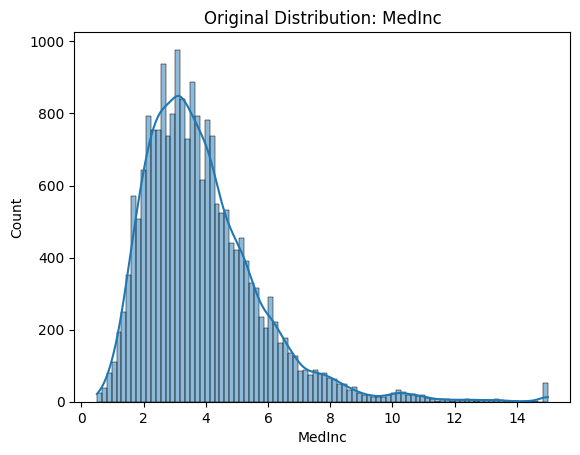

Skewness: 1.64653702990008


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import numpy as np

# توزيع الدخل
sns.histplot(df['MedInc'], kde=True)
plt.title("Original Distribution: MedInc")
plt.show()

# فحص الانحراف
print("Skewness:", skew(df['MedInc']))  # مثلاً تطلع ~1.6

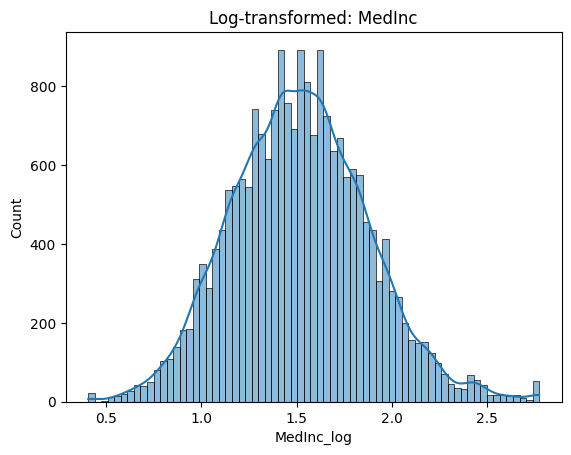

In [ ]:
)df['MedInc_log'] = np.log1p(df['MedInc'])

# بعد التحويل
sns.histplot(df['MedInc_log'], kde=True)
plt.title("Log-transformed: MedInc")
plt.show()